In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras import optimizers
# from sklearn.model_selection import train_test_split
from keras import backend as k

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
tf.random.set_seed(42)

## `Case 1`


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:

# Reduce pixel values
# Reduce pixel values
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255. 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [7]:
y_train.shape

(50000,)

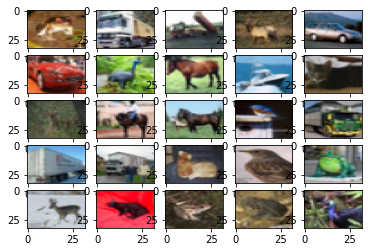

In [8]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(X_train[k], aspect='auto')
		k += 1

plt.show()


In [9]:
pd.value_counts(y_train)

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

In [10]:
X_train.shape[1:]

(32, 32, 3)

In [11]:
Xn_cifar=X_train
Xs_cifar=X_test
yn_cifar=y_train
ys_cifar=y_test

### `DNN`

In [12]:
#flatten
X_train_f = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test_f = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train_f.shape)
print(X_test_f.shape)

(50000, 3072)
(10000, 3072)


In [13]:
model = tf.keras.Sequential([
                             
    Dense(3072,input_shape=(3072,),activation='relu'),
    Dropout(0.2),
    Dense(768, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(96, activation='relu'),
    Dropout(0.2),
    Dense(48, activation='relu'),

    Dense(10,activation='softmax')
])

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3072)              9440256   
                                                                 
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 768)               2360064   
                                                                 
 dropout_1 (Dropout)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               98432     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 96)                1

In [15]:
model.compile(optimizer=optimizers.Adam( learning_rate=0.0001,beta_1=0.8,beta_2=0.99,),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'],)

In [16]:
history = model.fit(X_train_f, y_train, epochs=50, batch_size=512,
                    validation_data=(X_test_f, y_test), validation_split=0.1
                    )

Epoch 1/50
88/88 [==============================] - 5s 16ms/step - loss: 2.1596 - accuracy: 0.1872 - val_loss: 1.9657 - val_accuracy: 0.2974
Epoch 2/50
88/88 [==============================] - 1s 12ms/step - loss: 1.9821 - accuracy: 0.2758 - val_loss: 1.8598 - val_accuracy: 0.3388
Epoch 3/50
88/88 [==============================] - 1s 13ms/step - loss: 1.8871 - accuracy: 0.3219 - val_loss: 1.7792 - val_accuracy: 0.3642
Epoch 4/50
88/88 [==============================] - 1s 12ms/step - loss: 1.8174 - accuracy: 0.3498 - val_loss: 1.7215 - val_accuracy: 0.3922
Epoch 5/50
88/88 [==============================] - 1s 13ms/step - loss: 1.7630 - accuracy: 0.3690 - val_loss: 1.7078 - val_accuracy: 0.3964
Epoch 6/50
88/88 [==============================] - 1s 13ms/step - loss: 1.7228 - accuracy: 0.3856 - val_loss: 1.6601 - val_accuracy: 0.4168
Epoch 7/50
88/88 [==============================] - 1s 13ms/step - loss: 1.6811 - accuracy: 0.4017 - val_loss: 1.6179 - val_accuracy: 0.4306
Epoch 8/50
88

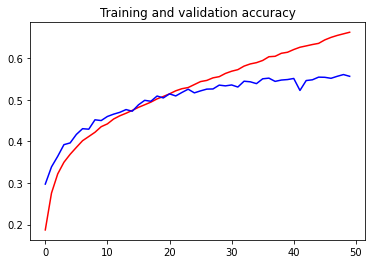

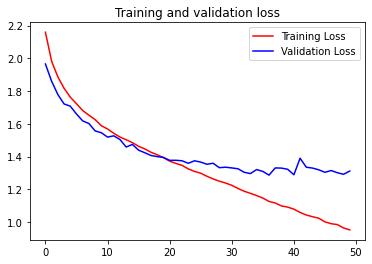

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Original label is horseship and predicted label is horseship


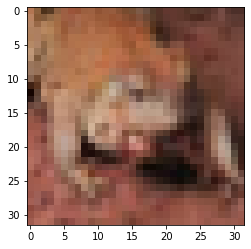

In [18]:
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
image_number = 5
plt.imshow(Xs_cifar[image_number].reshape((32,32,3)))
n = np.array(Xs_cifar[image_number].reshape((32,32,3)))
p = n.reshape(1,np.prod(Xs_cifar.shape[1:]))
predicted_label = labels[model.predict(p).argmax()]
original_label = labels[ys_cifar[image_number]]
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))

### `CNN`

In [19]:
shape=X_train[0].shape
shape

(32, 32, 3)

In [20]:
# padding='same'
model2 = tf.keras.Sequential([
    Input(shape=X_train[0].shape),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dropout(0.2),
    
    Dense(512, activation='relu'),
    Dropout(0.30),
    # Dense(512, activation='relu'),
    # Dropout(0.2),
    
    Dense(10, activation='softmax')])

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                      

In [22]:
# Compile
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history2 = model2.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_test, y_test), 
                   batch_size=64,validation_split=0.1 )

Epoch 1/50
704/704 [==============================] - 17s 11ms/step - loss: 1.4179 - accuracy: 0.5027 - val_loss: 1.0300 - val_accuracy: 0.6376
Epoch 2/50
704/704 [==============================] - 7s 9ms/step - loss: 0.9228 - accuracy: 0.6750 - val_loss: 0.8314 - val_accuracy: 0.7142
Epoch 3/50
704/704 [==============================] - 7s 9ms/step - loss: 0.7461 - accuracy: 0.7391 - val_loss: 0.7380 - val_accuracy: 0.7446
Epoch 4/50
704/704 [==============================] - 7s 9ms/step - loss: 0.6408 - accuracy: 0.7783 - val_loss: 0.7436 - val_accuracy: 0.7446
Epoch 5/50
704/704 [==============================] - 7s 9ms/step - loss: 0.5582 - accuracy: 0.8049 - val_loss: 0.5889 - val_accuracy: 0.7978
Epoch 6/50
704/704 [==============================] - 7s 9ms/step - loss: 0.4795 - accuracy: 0.8326 - val_loss: 0.6540 - val_accuracy: 0.7880
Epoch 7/50
704/704 [==============================] - 7s 9ms/step - loss: 0.4176 - accuracy: 0.8542 - val_loss: 0.7608 - val_accuracy: 0.7682
Epoc

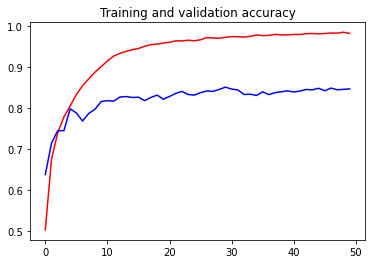

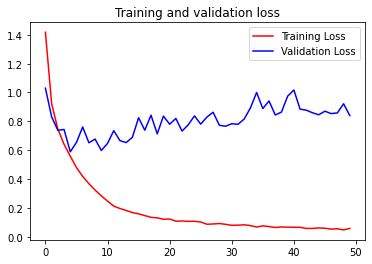

In [24]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Original label is cat and predicted label is cat


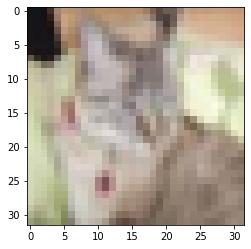

In [25]:

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

image_number = 8
plt.imshow(Xs_cifar[image_number])
n = np.array(Xs_cifar[image_number])
p = n.reshape(1, 32, 32, 3)
predicted_label = labels[model2.predict(p).argmax()]
original_label = labels[ys_cifar[image_number]]
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))

## `Case 2`


In [26]:
# Load in the data
mnist = tf.keras.datasets.mnist
# Distribute it to train and test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
X_test.shape

(10000, 28, 28)

In [29]:
y_train.shape

(60000,)

In [30]:
# Reduce pixel values
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [31]:
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [32]:
Xn_mnist=X_train
Xs_mnist=X_test
yn_mnist=y_train
ys_mnist=y_test

In [33]:
X_train.shape

(60000, 28, 28, 1)

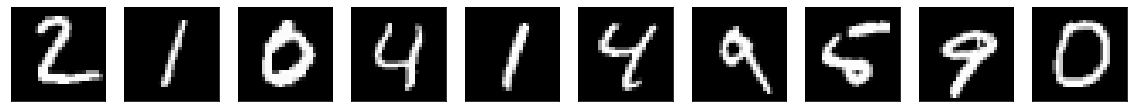

In [34]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [35]:
pd.value_counts(y_train)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [36]:
y_train_c = keras.utils.to_categorical(y_train)
y_test_c = keras.utils.to_categorical(y_test)

In [37]:
y_train_c

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [38]:
y_test_c

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
X_train[0].shape

(28, 28, 1)

In [40]:
X_train.shape[1:]

(28, 28, 1)

### `DNN`

In [41]:
#flatten
X_train_ff = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test_ff = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train_ff.shape)
print(X_test_ff.shape)

(60000, 784)
(10000, 784)


In [42]:
model3 = tf.keras.Sequential([
    Dense(784,input_shape=(784,),activation='relu'),
    Dropout(0.2),
    Dense(392, activation='relu'),
    Dropout(0.2),
    Dense(196, activation='relu'),
    Dropout(0.2),
    Dense(98, activation='relu'),
    Dropout(0.2),
    Dense(49, activation='relu'),
    # Dropout(0.2),
    # Dense(24, activation='relu'),
    Dense(10,activation='softmax')
])

In [43]:
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dropout_6 (Dropout)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 392)               307720    
                                                                 
 dropout_7 (Dropout)         (None, 392)               0         
                                                                 
 dense_10 (Dense)            (None, 196)               77028     
                                                                 
 dropout_8 (Dropout)         (None, 196)               0         
                                                                 
 dense_11 (Dense)            (None, 98)               

In [44]:
from operator import le
model3.compile(optimizer=optimizers.Adam(learning_rate=0.001,beta_1=0.8,beta_2=0.99),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'],)

In [45]:
X_train_ff.shape

(60000, 784)

In [46]:
y_test.shape

(10000,)

In [47]:
history3 = model3.fit(X_train_ff, y_train, epochs=50, 
                    validation_data=(X_test_ff, y_test), 
                   batch_size=64,validation_split=0.1 )

Epoch 1/50
844/844 [==============================] - 4s 4ms/step - loss: 0.3255 - accuracy: 0.9029 - val_loss: 0.1165 - val_accuracy: 0.9682
Epoch 2/50
844/844 [==============================] - 3s 4ms/step - loss: 0.1461 - accuracy: 0.9603 - val_loss: 0.0964 - val_accuracy: 0.9730
Epoch 3/50
844/844 [==============================] - 3s 3ms/step - loss: 0.1095 - accuracy: 0.9709 - val_loss: 0.0748 - val_accuracy: 0.9782
Epoch 4/50
844/844 [==============================] - 3s 3ms/step - loss: 0.0876 - accuracy: 0.9759 - val_loss: 0.0899 - val_accuracy: 0.9755
Epoch 5/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0734 - accuracy: 0.9791 - val_loss: 0.0900 - val_accuracy: 0.9780
Epoch 6/50
844/844 [==============================] - 3s 3ms/step - loss: 0.0665 - accuracy: 0.9816 - val_loss: 0.0759 - val_accuracy: 0.9805
Epoch 7/50
844/844 [==============================] - 3s 3ms/step - loss: 0.0583 - accuracy: 0.9839 - val_loss: 0.0746 - val_accuracy: 0.9795
Epoch 

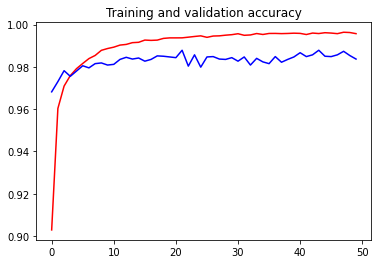

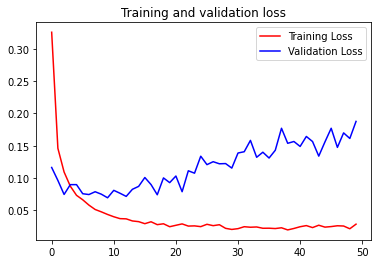

In [48]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Original label is 1 and predicted label is 1


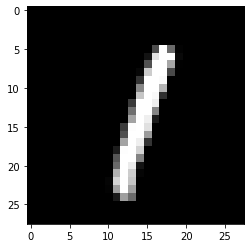

In [49]:
# label mapping

labels = list(sorted(pd.unique(y_train)))

# select the image from our test dataset
image_number = 5

plt.imshow(Xs_mnist[image_number].reshape((28,28)))
n = np.array(Xs_mnist[image_number].reshape((28,28)))
p = n.reshape(1,np.prod(Xs_mnist.shape[1:]))
predicted_label = labels[model3.predict(p).argmax()]
original_label = labels[ys_mnist[image_number]]

print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))

### `CNN`

In [50]:
model4 = tf.keras.Sequential([
    Input(shape=(28,28,1)),
    Conv2D(28, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(28, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    
    # Conv2D(128, (3, 3), activation='relu', padding='same'),
    # BatchNormalization(),
    # Conv2D(128, (3, 3), activation='relu', padding='same'),
    # BatchNormalization(),
    # MaxPooling2D((2, 2)),
    
    Flatten(),
    Dropout(0.2),
    
    # Hidden layer
    Dense(250, activation='relu'),
    Dropout(0.2),
    
    # last hidden layer i.e.. output layer
    Dense(10, activation='softmax')])

In [51]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                      

In [52]:
X_test.shape

(10000, 28, 28, 1)

In [53]:

# Compile
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
history4 = model4.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_test, y_test), 
                    )

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1354 - accuracy: 0.9617 - val_loss: 0.0960 - val_accuracy: 0.9743
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0621 - accuracy: 0.9822 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0519 - accuracy: 0.9860 - val_loss: 0.0238 - val_accuracy: 0.9928
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0392 - accuracy: 0.9893 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9904 - val_loss: 0.0366 - val_accuracy: 0.9901
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0299 - accuracy: 0.9914 - val_loss: 0.0351 - val_accuracy: 0.9904
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.0268 - val_accuracy

Original label is 4 and predicted label is 4


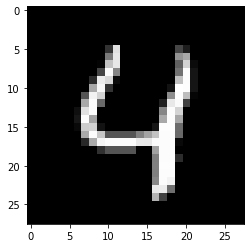

In [55]:

labels = list(sorted(pd.unique(y_train)))
image_number = 4
plt.imshow(Xs_mnist[image_number].reshape((28,28)))
n = np.array(Xs_mnist[image_number].reshape((28,28)))
p = n.reshape(1, 28, 28, 1)
predicted_label = labels[model4.predict(p).argmax()]
original_label = labels[ys_mnist[image_number]]
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))

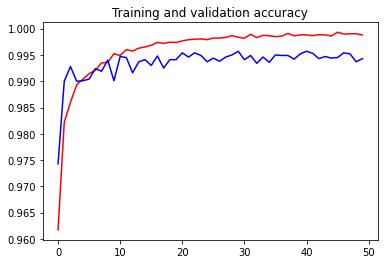

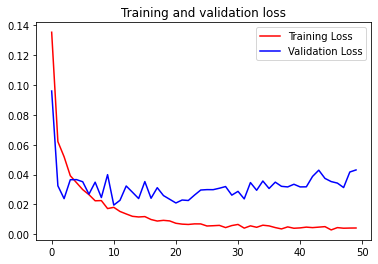

In [56]:
import matplotlib.pyplot as plt
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()